In [66]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Modelling 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR 
from xgboost import XGBRegressor  

warnings.filterwarnings('ignore')


In [67]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [68]:
X = df.drop(columns=['math score'],axis=1)
y = df['math score']
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [69]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude='object').columns 
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# pass input as list of tuple

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)


In [70]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=32)

In [71]:
X_train = preprocessor.fit_transform(X_train) 
X_test = preprocessor.transform(X_test)

### Model Evaluation

In [72]:
def model_evaluation(true,pred,data_type: str):

    mse = mean_squared_error(true,pred)
    mae = mean_absolute_error(true,pred)
    r2_value = r2_score(true,pred) 
    rmse = np.sqrt(mse)

    print(f"- {data_type} Data: ")
    print()

    print(" - Mean Squared Error: {:.4f}".format(mse))
    print(" - Mean Absolute Error: {:.4f}".format(mae))
    print(" - Root Mean Square Error: {:.4f}".format(rmse))
    print(" - R-Squared Error: {:.4f}".format(r2_value))
    print()

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "K-Neighbors-Regressor": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBoostRegressor": XGBRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "GradientBoostRegressor": GradientBoostingRegressor()
}    

In [73]:
model_performance = []

for modelName,model in models.items():

    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("Model: ",modelName)
    print()
    
    model_evaluation(y_train,y_train_pred,"Trained")

    model_evaluation(y_test,y_test_pred,"Test")

    model_performance.append([modelName,r2_score(y_test,y_test_pred)])

Model:  LinearRegression

- Trained Data: 

 - Mean Squared Error: 28.2414
 - Mean Absolute Error: 4.2352
 - Root Mean Square Error: 5.3143
 - R-Squared Error: 0.8819

- Test Data: 

 - Mean Squared Error: 29.1687
 - Mean Absolute Error: 4.2998
 - Root Mean Square Error: 5.4008
 - R-Squared Error: 0.8614

Model:  Ridge

- Trained Data: 

 - Mean Squared Error: 28.2450
 - Mean Absolute Error: 4.2342
 - Root Mean Square Error: 5.3146
 - R-Squared Error: 0.8818

- Test Data: 

 - Mean Squared Error: 29.1378
 - Mean Absolute Error: 4.2980
 - Root Mean Square Error: 5.3979
 - R-Squared Error: 0.8616

Model:  Lasso

- Trained Data: 

 - Mean Squared Error: 42.6268
 - Mean Absolute Error: 5.1680
 - Root Mean Square Error: 6.5289
 - R-Squared Error: 0.8217

- Test Data: 

 - Mean Squared Error: 38.9995
 - Mean Absolute Error: 4.8957
 - Root Mean Square Error: 6.2450
 - R-Squared Error: 0.8147

Model:  K-Neighbors-Regressor

- Trained Data: 

 - Mean Squared Error: 35.0265
 - Mean Absolute Erro

In [74]:
model_performance = sorted(model_performance,key=lambda x:x[1],reverse=True)
models = pd.DataFrame(model_performance, columns=['Model', 'R2_Score'])
models

,Model,R2_Score
0,Ridge,0.861562
1,LinearRegression,0.861416
2,GradientBoostRegressor,0.852851
3,AdaBoostRegressor,0.830733
4,Lasso,0.814708
5,RandomForestRegressor,0.807449
6,XGBoostRegressor,0.774288
7,K-Neighbors-Regressor,0.760660
8,DecisionTree,0.666614


### Linear Regression

Text(0, 0.5, 'Predicted Values')

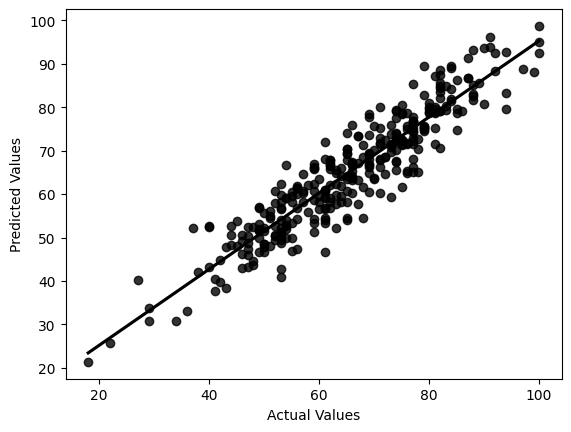

In [75]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred,ci=None,color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [76]:
# so we will take AdaBoost and GradientBoost for hyper parameter tunning

lasso_params = {
    "alpha": [0.1, 0.01, 0.001, 1, 10],  # Regularization strength
    "max_iter": [1000, 5000, 10000],  # Number of iterations for optimization
    "selection": ['cyclic', 'random']  # Optimization technique
}

ridge_params = {
    "alpha": [0.1, 0.01, 0.001, 1, 10],  # Regularization strength
    "solver": ['auto', 'lsqr', 'saga', 'cholesky'],  # Optimization algorithm
    "max_iter": [1000, 5000, 10000]  # Number of iterations for optimization
}

ada_params = {
    "n_estimators": [50,55,60,65,70,80],
    "loss": ['linear','square','exponential']
}

gradientboost_params = {
    "loss": ['squared_error','huber','absolute_error'],
    "criterion": ['friedman_mse','squared_error','mse'],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000],
    "max_depth": [5,8,15,None,10],
    "learning_rate": [0.1,0.01,0.02,0.2]
}

In [77]:
tunning_models = [
    ('LassoRegression',Lasso(),lasso_params),
    ('RidgeRegression', Ridge(),ridge_params),
    ('AdaBoost Regression',AdaBoostRegressor(),ada_params),
    ('GradientBoost Regression',GradientBoostingRegressor(),gradientboost_params),
]

In [78]:
from sklearn.model_selection import RandomizedSearchCV 

model_param = {}
best_tuned_model = {}

for name,model,params in tunning_models:
    randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,cv=3,verbose=1,refit=True)
    randomcv.fit(X_train,y_train)
    best_tuned_model[name] = randomcv
    model_param[name] = randomcv.best_params_

print(model_param)
print()
for key1,dict in model_param.items():
    print(f"For the model {key1}")
    for k,v in dict.items():
        print(k,v, end="  ")
    print()
    print()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'LassoRegression': {'selection': 'cyclic', 'max_iter': 10000, 'alpha': 0.01}, 'RidgeRegression': {'solver': 'lsqr', 'max_iter': 5000, 'alpha': 0.1}, 'AdaBoost Regression': {'n_estimators': 55, 'loss': 'square'}, 'GradientBoost Regression': {'n_estimators': 500, 'min_samples_split': 8, 'max_depth': 5, 'loss': 'huber', 'learning_rate': 0.01, 'criterion': 'squared_error'}}

For the model LassoRegression
selection cyclic  max_iter 10000  alpha 0.01  

For the model RidgeRegression
solver lsqr  max_iter 5000  alpha 0.1  

For the model AdaBoost Regression
n_estimators 55  loss square  

For the model GradientBoost Regression
n_estimators 500  min_samples_split 8  max_depth 5  loss huber  learning_rate 0.01  criterion squared_error  



In [79]:
print("Tunned Model Performance: \n")

for name,tuned_model in best_tuned_model.items():

    y_test_pred = tuned_model.predict(X_test)
    y_train_pred = tuned_model.predict(X_train)

    # evaluate the model 
    print(f"Model: {name}")
    print()

    model_evaluation(y_test,y_test_pred,"Test")
    model_evaluation(y_train,y_train_pred,"Trained") 


Tunned Model Performance: 

Model: LassoRegression

- Test Data: 

 - Mean Squared Error: 29.0832
 - Mean Absolute Error: 4.2938
 - Root Mean Square Error: 5.3929
 - R-Squared Error: 0.8618

- Trained Data: 

 - Mean Squared Error: 28.2528
 - Mean Absolute Error: 4.2377
 - Root Mean Square Error: 5.3153
 - R-Squared Error: 0.8818

Model: RidgeRegression

- Test Data: 

 - Mean Squared Error: 29.1638
 - Mean Absolute Error: 4.2995
 - Root Mean Square Error: 5.4004
 - R-Squared Error: 0.8614

- Trained Data: 

 - Mean Squared Error: 28.2414
 - Mean Absolute Error: 4.2350
 - Root Mean Square Error: 5.3143
 - R-Squared Error: 0.8819

Model: AdaBoost Regression

- Test Data: 

 - Mean Squared Error: 36.2540
 - Mean Absolute Error: 4.7506
 - Root Mean Square Error: 6.0211
 - R-Squared Error: 0.8278

- Trained Data: 

 - Mean Squared Error: 33.9994
 - Mean Absolute Error: 4.7876
 - Root Mean Square Error: 5.8309
 - R-Squared Error: 0.8578

Model: GradientBoost Regression

- Test Data: 

 - Me